## IMPLEMENTATION GAUSSIAN PROCESSE :

Afin de pouvoir construire un modele qui utilise ce fonction on va d'abord l'implémenter .

In [88]:
def kernel(X1, X2, sigma):
        M = np.zeros((X1.shape[0], X2.shape[0]))
        for i in range(X1.shape[0]):
            for j in range(X2.shape[0]):
                M[i][j] = np.exp(-((np.linalg.norm(X1[i] - X2[j]))**2) / sigma**2)
        return M

In [90]:
class Gaussianprocess() :
    
    def __init__(self,intercept:bool,sigma: float, alpha: float):
        self.intercept= intercept
        self.sigma=sigma
        self.alpha=alpha
        
    def fit(self,X,y):
        if self.intercept:
            self.X = np.hstack((X,np.ones((X.shape[0], 1))))
        else:
            self.X = X
        self.moy = np.mean(y)
        self.y = y-self.moy
        
    def predict(self,X):
        if self.intercept:
            X = np.hstack((X,np.ones((X.shape[0], 1))))
        Ke = kernel(self.X,X, self.sigma)
        K = kernel(self.X, self.X, self.sigma).T
        
        u= Ke.T @ np.linalg.inv(K+(self.alpha**2)*np.eye(K.shape[0])) @ self.y
        return u + self.moy
        
        

## Création de model :


Tout d'abord nous allons procéder à l'exploration des données:


### EXPLORATORY DATA ANALYSIS:

Nous allons d'abord importer les données nécéssaire que l'on a besoin .

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [9]:
data = pd.read_csv( "mauna_loa.csv")

In [10]:
df =data.copy()

In [11]:
df.head(2)

,Unnamed: 0,year,month,day,weight,flag,station,co2
0,0,1958,3,29,4,0,MLO,316.1
1,1,1958,4,5,6,0,MLO,317.3


In [12]:
df = df.drop(columns='Unnamed: 0')

## ANALYSE DE FORME :

#### Identification du variable cible et analyse du tableau  :

Nous allons comme variables cibles la colonnes co2.

In [13]:
df.shape

(2225, 7)

Nous avons donc ici 2225 lignes et 7 colonnes.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     2225 non-null   int64  
 1   month    2225 non-null   int64  
 2   day      2225 non-null   int64  
 3   weight   2225 non-null   int64  
 4   flag     2225 non-null   int64  
 5   station  2225 non-null   object 
 6   co2      2225 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 121.8+ KB


In [15]:
df.dtypes.value_counts()

int64      5
object     1
float64    1
dtype: int64

<Axes: >

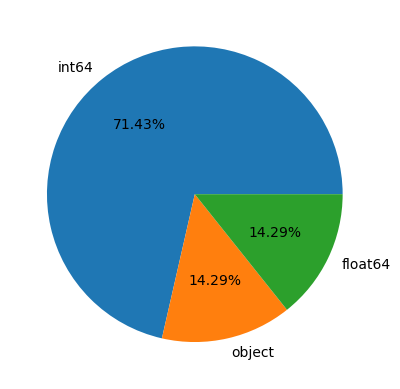

In [16]:
def pct(pct):
    return str(round(pct, 2)) + '%'
df.dtypes.value_counts().plot.pie(autopct=pct)

Il y a donc ici trois type de variables; variables int qui semble ici etre en majorité et la variables float qui est à egal quantité avec les variables quantitatives.

On va maintenenant passer à l'identification des valeurs manquantes.

#### Analyses des valeurs manquantes :

<Axes: >

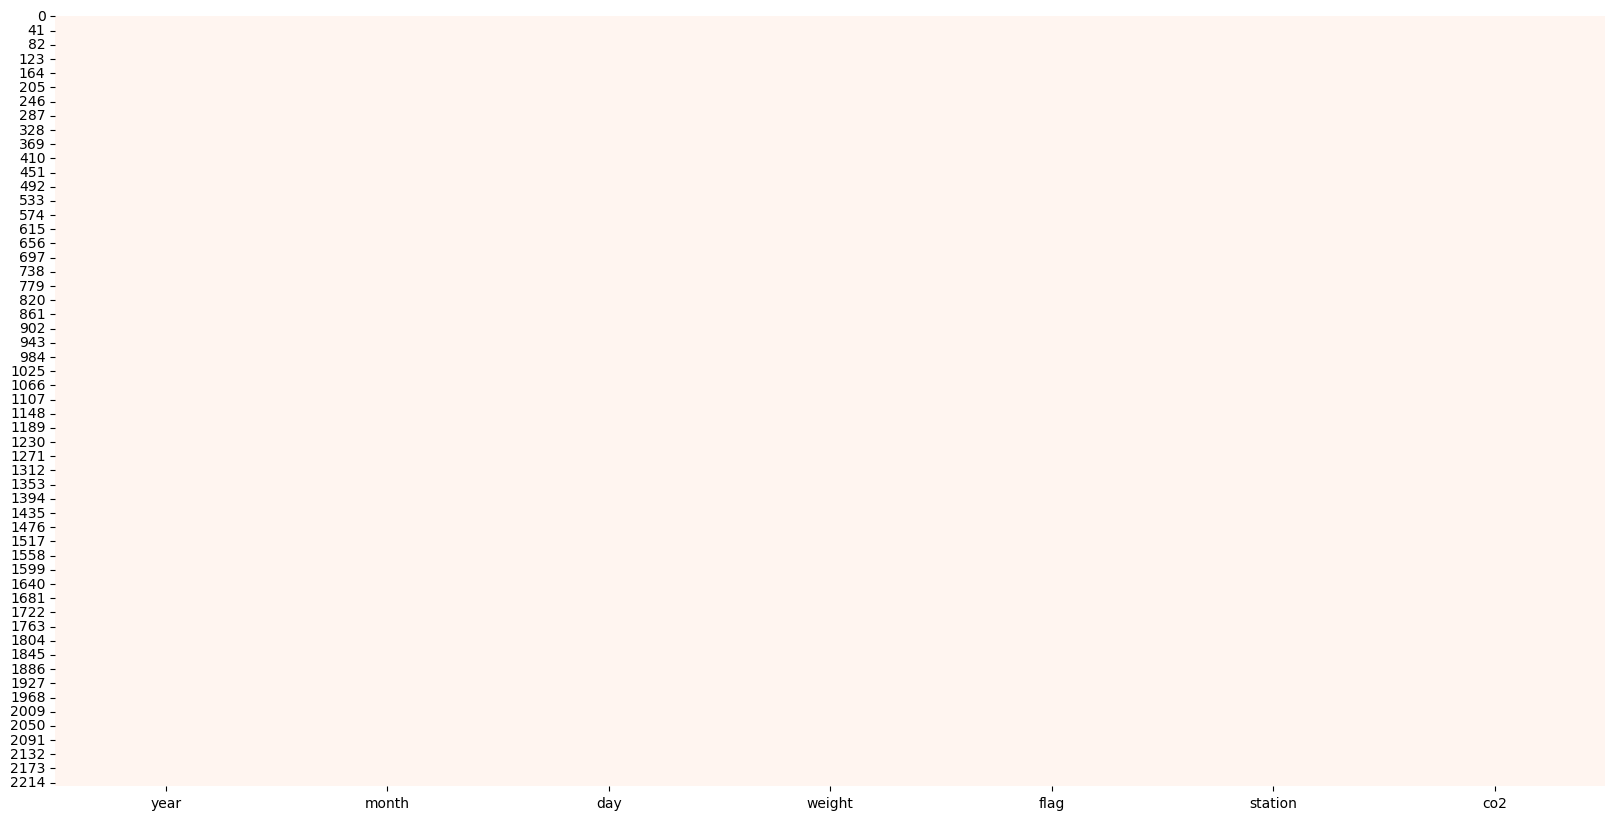

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cmap='Reds',cbar=False)


Il n'y a pas de valeurs manquantes dans notre données.

### Analyse du Fond:

In [18]:
df.head(2)

,year,month,day,weight,flag,station,co2
0,1958,3,29,4,0,MLO,316.1
1,1958,4,5,6,0,MLO,317.3


### Visualisation du target :

Notre variables cibles est la colonnes 'Yield'.

In [19]:
df['co2'].dtypes

dtype('float64')

Notre variables est de types float , autrement dit quatitatives .


In [20]:
df['co2'].describe()

count    2225.000000
mean      340.142247
std        17.003885
min       313.000000
25%       324.800000
50%       338.300000
75%       354.800000
max       373.900000
Name: co2, dtype: float64

Notre colonnes de variable cible compte 2225 cela marque qu'il n'y a pas de valeurs maquantes. De plus on remarque aussi que mla moyenne est superieur a l'ecartype.

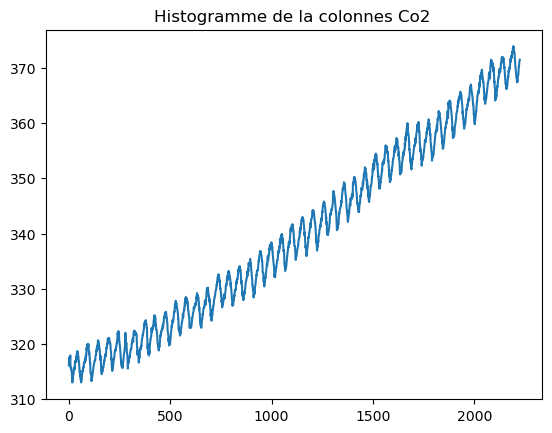

In [33]:
plt.plot(df['co2'])
plt.title("Histogramme de la colonnes Co2 ")

plt.show()

On remarque que le taux de c02 est croissant au cours du temps , on peut dire que c'est un trend c'est à dire que la moyenne varie au cours du temps.Donc on en déduit que elle ne suit pas un loi normal.

Alors que dans notre probleme on veut utiliser la methode de gassian processe qui va avoir dbesoin qu'il suivent se loi normal donc on doit eliminer le trend.

In [62]:
df['diff'] = df['co2'].diff().dropna()

#### Analyse des variables caractéristiques :

##### Analyse du variables quantitatives:

In [27]:
for col in df.select_dtypes(np.number):
    print(col)

year
month
day
weight
flag
co2


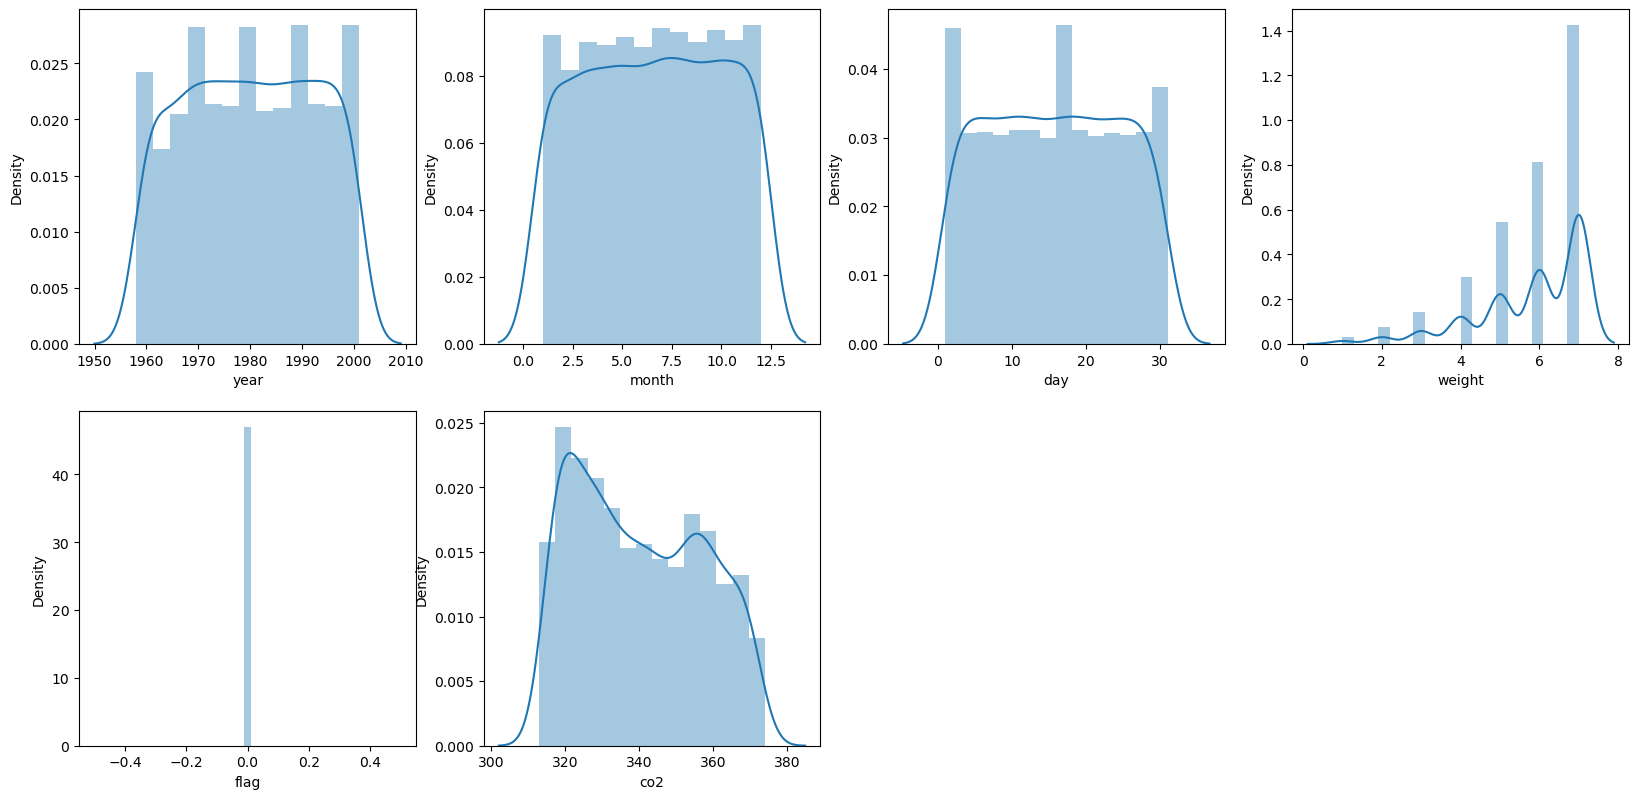

In [35]:
i=1
plt.figure(figsize=(20,20))
for col in df.select_dtypes(np.number):
    plt.subplot(4,4, i)
    sns.distplot(df[col])
    i += 1
plt.show()

On remarque  que dans le graphe de flags , tous les variables sont zéros . Et le graphe "weight" est très varié

In [29]:
for col in df.select_dtypes('object'):
    print(f'{col:-<30}{df[col].unique()}')


station-----------------------['MLO']


il n'existe qu'un seul object de type object.

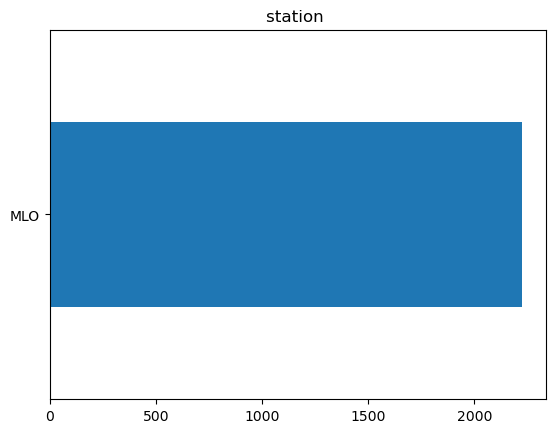

In [32]:
df['station'].value_counts().plot(kind="barh")
plt.title("station ")

plt.show()

Il y a qu'un seul variables dans notre colonnes .

#### Relation entre target et variables:


#### Relation entre les variables quantitatives( variables cibles inclus):

Puisque notre variables cibles est de types quantitatives alors on peut regarder cela ensemble .Donc regardons la correlation entre variables numérique et le variables cibles , ainsi que les relation entre chaque les variables quantitatives.

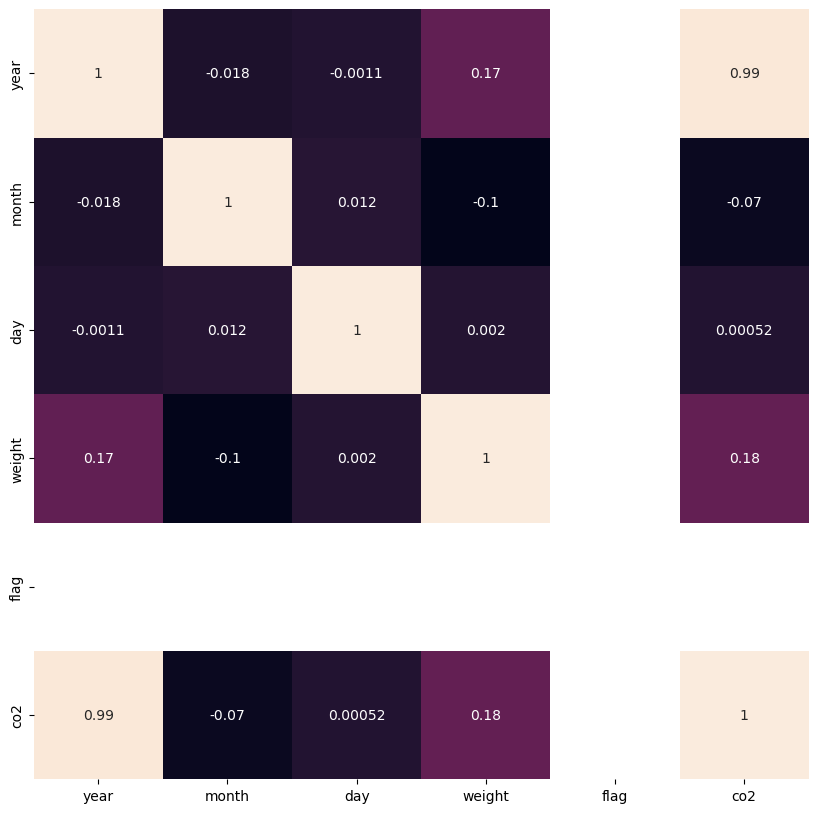

In [36]:
plt.figure(figsize=(10,10))
correlation=df.select_dtypes(np.number).corr()
sns.heatmap(correlation, annot=True,cbar=False)
plt.show()

On remarque une forte correlation entre la variables cibles et la variable 0.99 presque cela nous semble très utiles .Tandis que contrairement à tous les données il semble avoir de tres faible correlation , voir avec la variables day qui va jusqu'a possible d'être négligable.on va donc enlever certains colonnes comme le day et le months .


In [39]:
df = df.drop(["month", "day"], axis=1)

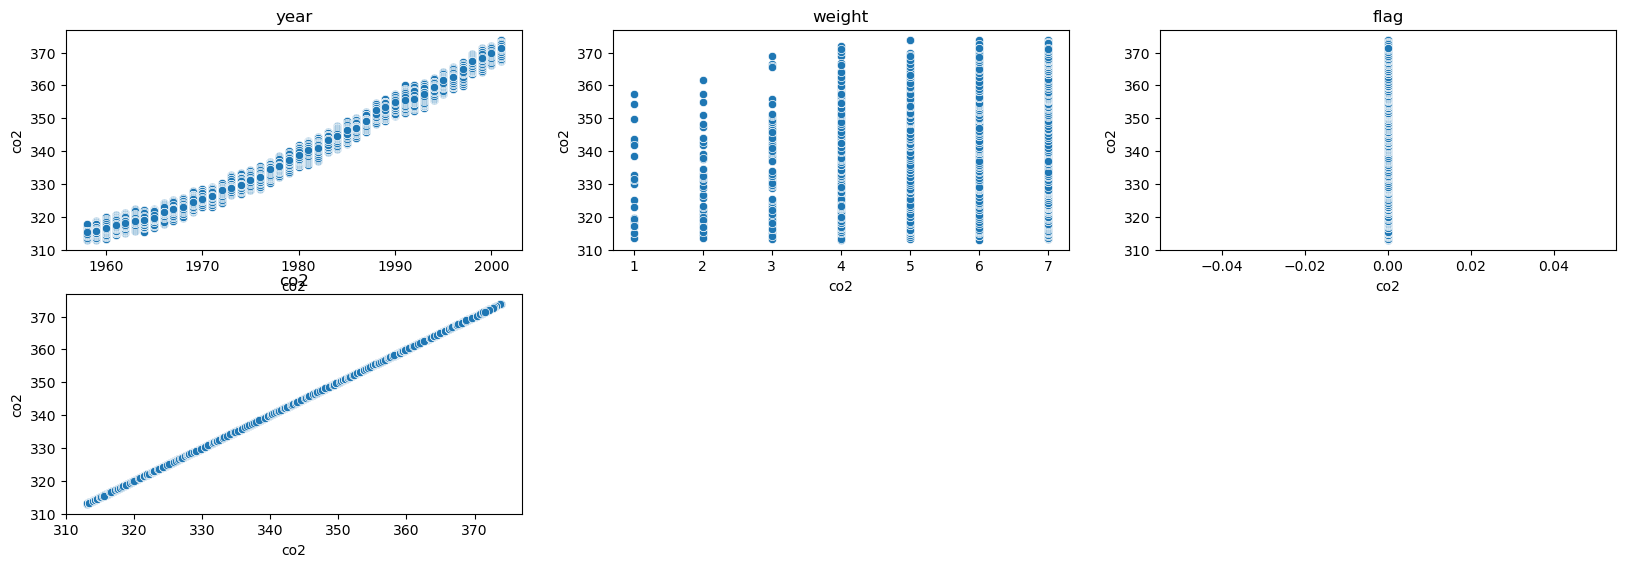

In [41]:
i=1
plt.figure(figsize=(20,20))

for col in df.select_dtypes(np.number):
    plt.subplot(6,3,i)
    sns.scatterplot(data=df, x=col, y="co2")
    plt.xlabel("co2")
    plt.title(col)
    i += 1
plt.show()

On remarque que il y a pas de outliers.

#### Relation entre variables cibles et les variables quanlitative:

<Axes: xlabel='station', ylabel='co2'>

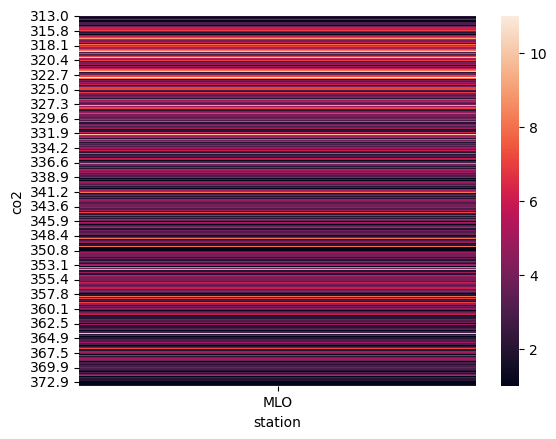

In [47]:
sns.heatmap(pd.crosstab(df['co2'],df['station']))

diificilel a lire et inutiles vue que l'on a qu'un seul variables dans la colonnes staion.

Depuis le début on a remarquer que les colonnes flag sont tous zéros donc on va l' enlever

In [55]:
data =df.copy()

In [52]:
df = df.drop(["flag"], axis=1)

puisque la colonnes station dne comporte qu'un seul variales cela nous semble asez evident de l'enlever aussi.

In [57]:
df = df.drop(["station"], axis=1)

Maintenant on va proceder on la preprocessing.

## PRE-PROCESSING:

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [60]:
trainset, testset = train_test_split(df, test_size =0.2, random_state=0)

In [66]:
def preprocessing(df):
  
    
    X = df.drop('co2',axis=1)
    y = df['co2']
    
    print(y.value_counts())
    
    return X,y

In [67]:
X_train , y_train=preprocessing(trainset)

364.1    10
332.1    10
323.1    10
321.9     9
320.0     8
         ..
334.0     1
350.3     1
339.4     1
357.7     1
349.0     1
Name: co2, Length: 572, dtype: int64


In [68]:
X_test , y_test=preprocessing(testset)

320.8    5
361.0    3
356.6    3
319.0    3
318.0    3
        ..
319.8    1
319.9    1
351.1    1
313.2    1
351.7    1
Name: co2, Length: 311, dtype: int64


## MODELISATION:

In [93]:
model = Gaussianprocess(intercept=True,sigma=0.1, alpha=0.1) 

# Fit model
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test.fillna(0))

# Measure model performance
mean_squared_error(y_test, preds, squared=False)

3.5466962305766363

----------------------------------------------------------------

Réference :

    - Phind